In [83]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Activation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [50]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

60000 train samples
10000 test samples


In [53]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
metrics=['accuracy'])

In [56]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s - loss: 0.2732 - acc: 0.9206 - val_loss: 0.1329 - val_acc: 0.9596
Epoch 2/10
60000/60000 [==============================] - 6s - loss: 0.1175 - acc: 0.9650 - val_loss: 0.0903 - val_acc: 0.9716
Epoch 3/10
60000/60000 [==============================] - 6s - loss: 0.0813 - acc: 0.9748 - val_loss: 0.0761 - val_acc: 0.9755
Epoch 4/10
60000/60000 [==============================] - 7s - loss: 0.0639 - acc: 0.9809 - val_loss: 0.0729 - val_acc: 0.9780
Epoch 5/10
60000/60000 [==============================] - 7s - loss: 0.0521 - acc: 0.9845 - val_loss: 0.0709 - val_acc: 0.9782
Epoch 6/10
60000/60000 [==============================] - 7s - loss: 0.0431 - acc: 0.9865 - val_loss: 0.0615 - val_acc: 0.9817
Epoch 7/10
60000/60000 [==============================] - 7s - loss: 0.0367 - acc: 0.9890 - val_loss: 0.0622 - val_acc: 0.9828
Epoch 8/10
60000/60000 [==============================] - 7s 

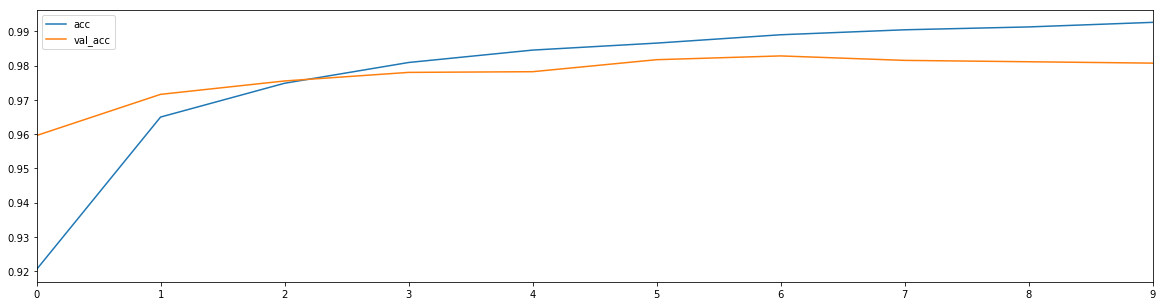

[0.071672378940045023, 0.98070000000000002]

In [57]:
h = pd.DataFrame([history.history['acc'], history.history['val_acc']])
h = h.T
h.columns=['acc', 'val_acc']
h.plot(figsize=(20, 5))
plt.show()
model.evaluate(x_test, y_test, verbose=0)

In [58]:
# Now, a convolutional network
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [59]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

In [87]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [97]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, 
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(10, activation='softmax'))

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_18/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [3,3,28,32].

In [95]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [96]:

model.fit(x_train, y_train,
          batch_size=10,
          epochs=32,
          verbose=1,
validation_data=(x_test, y_test))

ValueError: Error when checking input: expected dense_7_input to have 2 dimensions, but got array with shape (60000, 28, 28)